In [12]:
import numpy as np
from scipy import stats

###### Задача 1) Из партии батареек с номинальным напряжением 12 В наугад выбрано семь штук. Согласно показаниям высокоточного вольтметра, фактически выдаваемое ими напряжение составило: 12,9; 11,6; 13,5; 13,9; 12,1; 11,9; 13,0 В соответственно. Можно ли считать, что среднее напряжение действительно равно 12 В?

In [31]:
sample = np.array([12.9, 11.6, 13.5, 13.9, 12.1, 11.9, 13.0])
mu0 = 12
level_conf = 0.05 # задаем уровень значимости

Это задача по гипотезе о среднем, Нулевая гипотеза: Среднее напряжение равно 12В, Альтернативная: Среднее напряжение не равно 12В (двусторонняя критическая область) 
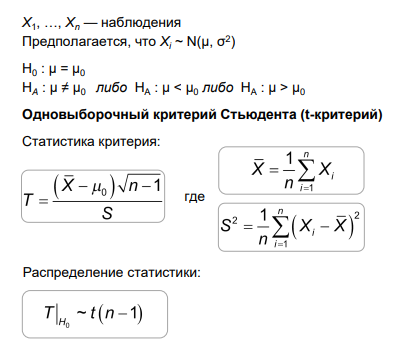

In [32]:
df = len(sample)-1 # вычисляем количество степеней свободы
t = stats.t(df)
T = (df)**0.5*(sample.mean() - mu0)/sample.std()
P = t.cdf(T)
print(f"Stats {T}, Квантили: {t.interval(0.95)}, p-value {P}")
if (P < level_conf):
    print(f"На уровне значимости {level_conf} нулевая гипотеза отвергается в пользу альтернативной")
else:
    print(f"На уровне значимости {level_conf} нулевая гипотеза принимается (Можно считать, что среднее напряжение действительно равно 12 В)")

Stats 2.1578017974978794, Квантили: (-2.4469118487916806, 2.4469118487916806), p-value 0.9628490489471885
На уровне значимости 0.05 нулевая гипотеза принимается (Можно считать, что среднее напряжение действительно равно 12 В)


###### Задача 2) Есть два различных метода определения процентного содержания жира в мясе. Доля жира для 10 образцов мяса была определена каждым из двух методов. Позволяют ли полученные результаты сделать вывод о том, что один метод даёт в среднем более высокие показания, чем другой?

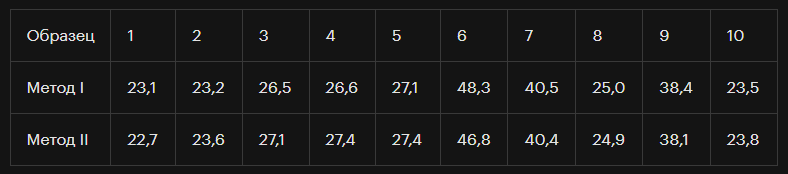

In [34]:
x = np.array([23.1, 23.2, 26.5, 26.6, 27.1, 48.3, 40.5, 25.0, 38.4, 23.5])
y = np.array([22.7, 23.6, 27.1, 27.4, 27.4, 46.8, 40.4, 24.9, 38.1, 23.8])

In [35]:
#Нормальное ли распеределение?
print('Проверка на нормальность')
print(stats.shapiro(x))
print(stats.shapiro(y))

Проверка на нормальность
ShapiroResult(statistic=0.786368727684021, pvalue=0.009897131472826004)
ShapiroResult(statistic=0.8126781582832336, pvalue=0.020663412287831306)


Это задача на гипотезу о равенстве средних для парных наблюдений.  Нулевая гипотеза: Методы дают одинаковые показатели. Альтернативная: Метод I дает более высокие показатели, чем метод II (односторонняя критическая область) Используем двухвыборочный критерий Стьюдента для парных выборок (Согласно проверочному критерию Шапиро это нормальные распределения)
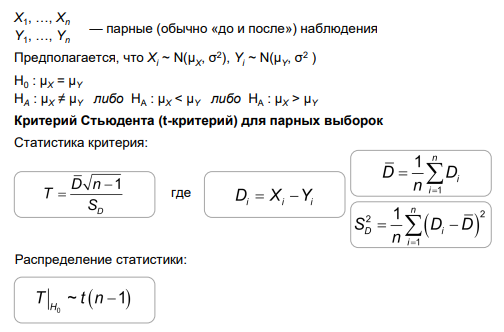

In [37]:
D = x - y
df = len(D)-1
t = stats.t(df)
T = (df)**0.5*(D.mean())/D.std()
P = 1-t.cdf(T) # альтернативная гипотеза что результат измерений по методу 1 лучше
print(f"Stats {T}, Квантили: {t.interval(0.95)}, p-value {P}")
if (P < level_conf):
    print(f"На уровне значимости {level_conf} нулевая гипотеза отвергается в пользу альтернативной")
else:
    print(f"На уровне значимости {level_conf} нулевая гипотеза принимается (Можно считать что один метод даёт в среднем такой же показатель как и другой другой)")

Stats 1.715488497867803e-15, Квантили: (-2.2621571627409915, 2.2621571627409915), p-value 0.49999999999999933
На уровне значимости 0.05 нулевая гипотеза принимается (Можно считать что один метод даёт в среднем такой же показатель как и другой другой)


######  Задача 3) Для проверки гипотезы о том, что жители городов имеют в среднем более высокое давление, чем жители сельской местности, было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления для горожан: 132, 111, 119, 138, 200, 131, 138, 170, 159, 140; для селян: 115, 190, 127, 155, 148, 121, 116, 121, 197. Можно ли считать верной выдвинутую гипотезу на уровне значимости 0,05?

In [59]:
X = np.array([132, 111, 119, 138, 200, 131, 138, 170, 159, 140]) # горожане мю_икс
Y = np.array([115, 190, 127, 155, 148, 121, 116, 121, 197]) # жители сельской местности мю_игрек

In [39]:
#Нормальное ли распеределение?
print('Проверка на нормальность')
print(stats.shapiro(X))
print(stats.shapiro(Y))

Проверка на нормальность
ShapiroResult(statistic=0.9100654125213623, pvalue=0.2814405560493469)
ShapiroResult(statistic=0.828664243221283, pvalue=0.04313988983631134)


Это задача по гипотезе о равенстве средних для независимых наблюдений, Нулевая гипотеза: Жители городов и сельской местности имеют в срднем одинаковое давление, Альтернативная: Жители городов имеют имеют в среднем более высокое давление (односторонняя критическая область). Используем критерий Манна-Уитни для независимых выборок (т.к. согласно критерию теста Шапиро, выборки ненормальные)
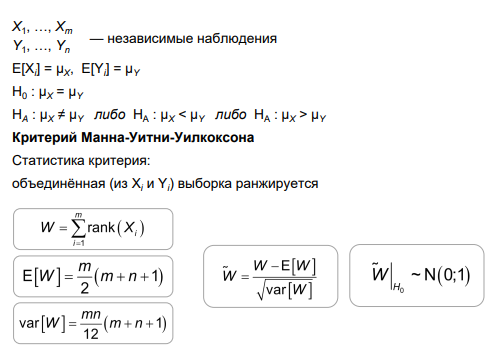

In [60]:
m = len(X) # объемы первой и второй выборки
n = len(Y)
xy = np.hstack([X, Y]) #строим объединенную выборку
r = stats.rankdata(xy) # ранжируем
ww = r[:m]
W = sum(ww)
ew = m*(m+n+1)/2
varw = m*n*(m+n+1)/12
WT = (W - ew)/varw**0.5
P=1-stats.norm.cdf(WT) # односторонняя критическая область
print(f"Stats {WT}, Квантили: {stats.norm.interval(0.95)}, p-value {P}")
if (P < level_conf):
    print(f"На уровне значимости {level_conf} нулевая гипотеза отвергается в пользу альтернативной")
else:
    print(f"На уровне значимости {level_conf} нулевая гипотеза принимается (Можно лсчитать верной выдвинутую нулевую гипотезу о равенстве давлений в среднем для жителей городов и жителей сельскоц местности на уровне значимости 0,05)")

Stats 0.408248290463863, Квантили: (-1.959963984540054, 1.959963984540054), p-value 0.34154569915480437
На уровне значимости 0.05 нулевая гипотеза принимается (Можно лсчитать верной выдвинутую нулевую гипотезу о равенстве давлений в среднем для жителей городов и жителей сельскоц местности на уровне значимости 0,05)


###### Задача 4) Известно, что 52% новорождённых детей — мальчики, а 48% — девочки. В случайной выборке из 5 000 человек в возрасте от 30 до 60 лет мужчин оказалось 2 500. Можно ли на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова?

Это задача о разности долей (вероятности), используем Биномиальный критерий для проверки гипотезы о равенстве долей / вероятностей в случае одной серии наблюдений (с двусторонней критической областью). 
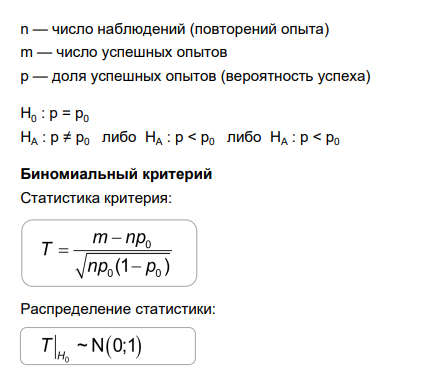

In [51]:
n = 
m = 112
p0 = 0.5

In [52]:
T = (m - n*p0)/(n*p0*(1-p0))**0.5
P = min(2*stats.norm.cdf(T), 2-2*stats.norm.cdf(T)) # находим п-значение для двустороней критической областм
print(f"Stats {T}, p-value {P}")
if (P < level_conf):
    print(f"На уровне значимости {level_conf} нулевая гипотеза отвергается в пользу альтернативной")
else:
    print(f"На уровне значимости {level_conf} нулевая гипотеза принимается (Можно на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова)")

Stats 0.0, p-value 1.0
На уровне значимости 0.05 нулевая гипотеза принимается (Можно на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова)


###### Задача 5) Для изучения эффективности лекарства против аллергии обследовались две группы людей, предрасположенных к этому заболеванию. Результаты обследования следующие: среди принимавших лекарство заболели 3 человека, не заболели 172 человека; среди не принимавших заболели 32 человека, не заболели 168. Указывают ли эти результаты на эффективность лекарства на уровне значимости 0,05?

Это задача о разности долей (вероятности), используем Биномиальный критерий для проверки гипотезы о равенстве долей / вероятностей в случае двух серии наблюдений (с односторонней критической областью).
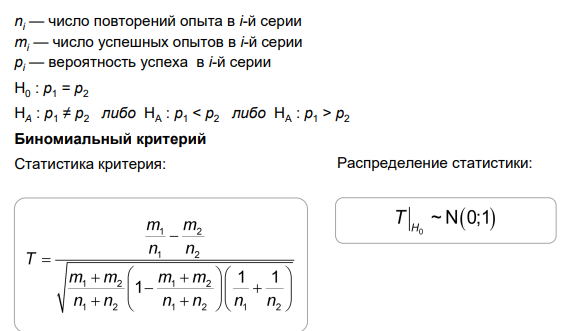

In [54]:
n1 = 172+3
m1 = 172
n2 = 168+32
m2 = 168

In [58]:
T = (m1/n1 - m2/n2)/((m1+m2)/(n1+n2)*(1 - (m1+m2)/(n1+n2))*(1/n1+1/n2))**0.5 #формула биномиального критерия вер-сти
P = 1 - stats.norm.cdf(T)  # вычисляем p-значение
# критичная область у нас со знаком БОЛЬШЕ, потому что задачался вопрос в альтернативной что ВАРИАНТ А был более значимым
print(f"Stats {T}, p-value {P}")
if (P < level_conf):
    print(f"На уровне значимости {level_conf} нулевая гипотеза отвергается в пользу альтернативной: Вариаент А более значим (значимая разница Варианта А перед вариантом Б есть: результаты указывают на эффективность лекарства на уровне значимости 0,05)")
else:
    print(f"На уровне значимости {level_conf} нулевая гипотеза принимается (нет значимой разницы между вариантом А и Б)")

Stats 4.744365458250511, p-value 1.0458046975081459e-06
На уровне значимости 0.05 нулевая гипотеза отвергается в пользу альтернативной: Вариаент А более значим (значимая разница Варианта А перед вариантом Б есть: результаты указывают на эффективность лекарства на уровне значимости 0,05)
